In [116]:
import pandas as pd
plt.style.use("mypresentation")
plt.rcParams["text.usetex"]=False

from scipy import stats

In [117]:
df=pd.read_csv("Aggregation.csv")

In [118]:
df=df[:442].copy()

### round filter

In [135]:
round1Filt=(np.array(df["Round_Fraction"],dtype=float)==1)
relaRoundFilt=(np.array(df["Round_Fraction"],dtype=float)>0.5)
relaFilaFilt=(np.array(df["Round_Fraction"],dtype=float)<0.5)
round0Filt=(np.array(df["Round_Fraction"],dtype=float)==0)

In [120]:
xlabL=["MLUM_MSUN","MLUM_MSUN","Optical_Cluster"]
ylabL=["MVIR_MSUN","HST_AV","FUV_Sources"]

xscaleL=["log","log","linear"]
yscaleL=["log","linear","linear"]


for xlab,ylab,xs,ys in zip (xlabL,ylabL,xscaleL,yscaleL):
    x=np.array(df[xlab],dtype=float)
    y=np.array(df[ylab],dtype=float)
#     print(df[xlab],np.isnan(df[xlab]).any())
    print(stats.spearmanr(x,y))
#     plt.figure()
#     plt.scatter(df[xlab],df[ylab])
#     plt.xlabel(xlab)
#     plt.ylabel(ylab)
#     plt.xscale(xs)
#     plt.yscale(ys)
#     plt.tight_layout()
#     plt.savefig("X_"+xlab+"_Y_"+ylab+".png")
#     plt.show()
#     plt.close()

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)


ValueError: could not convert string to float: '#NUM!'

In [136]:
SFemb=["MIR_Cpt_Fraction"]
SFyoung=["Cpt_HII_region","FUV_Sources"]
SFold=["Optical_Cluster","Diffuse_HII_Fraction"]

In [154]:
df["Optical_Cluster"][df["Optical_Cluster"]=='#NUM!']=-1

/Users/hqchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
noThresh=0.2

nothingFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)<noThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<noThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<noThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<noThresh)&\
                            (np.array(df["Diffuse_HII_Fraction"],dtype=float)<noThresh)

embFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)>noThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<noThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<noThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<noThresh)&\
                            (np.array(df["Diffuse_HII_Fraction"],dtype=float)<noThresh)

earlyFilt=(~nothingFilt)&(~embFilt)&(np.array(df["Optical_Cluster"],dtype=float)<noThresh)&\
                (np.array(df["Diffuse_HII_Fraction"],dtype=float)<noThresh)

midFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)&((np.array(df["Optical_Cluster"],dtype=float)<0.8)|\
                (np.array(df["Diffuse_HII_Fraction"],dtype=float)<noThresh))


lateFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)&(~midFilt)
# &\
#             ((np.array(df["Optical_Cluster"],dtype=float)>0.8)|(np.array(df["Diffuse_HII_Fraction"],dtype=float)>noThresh))

In [278]:
print(np.sum(nothingFilt))
print(np.sum(embFilt))
print(np.sum(earlyFilt))
print(np.sum(midFilt))
print(np.sum(lateFilt))
print(np.sum(nothingFilt)+np.sum(embFilt)+np.sum(earlyFilt)+np.sum(midFilt)+np.sum(lateFilt))


28
22
28
173
191
442


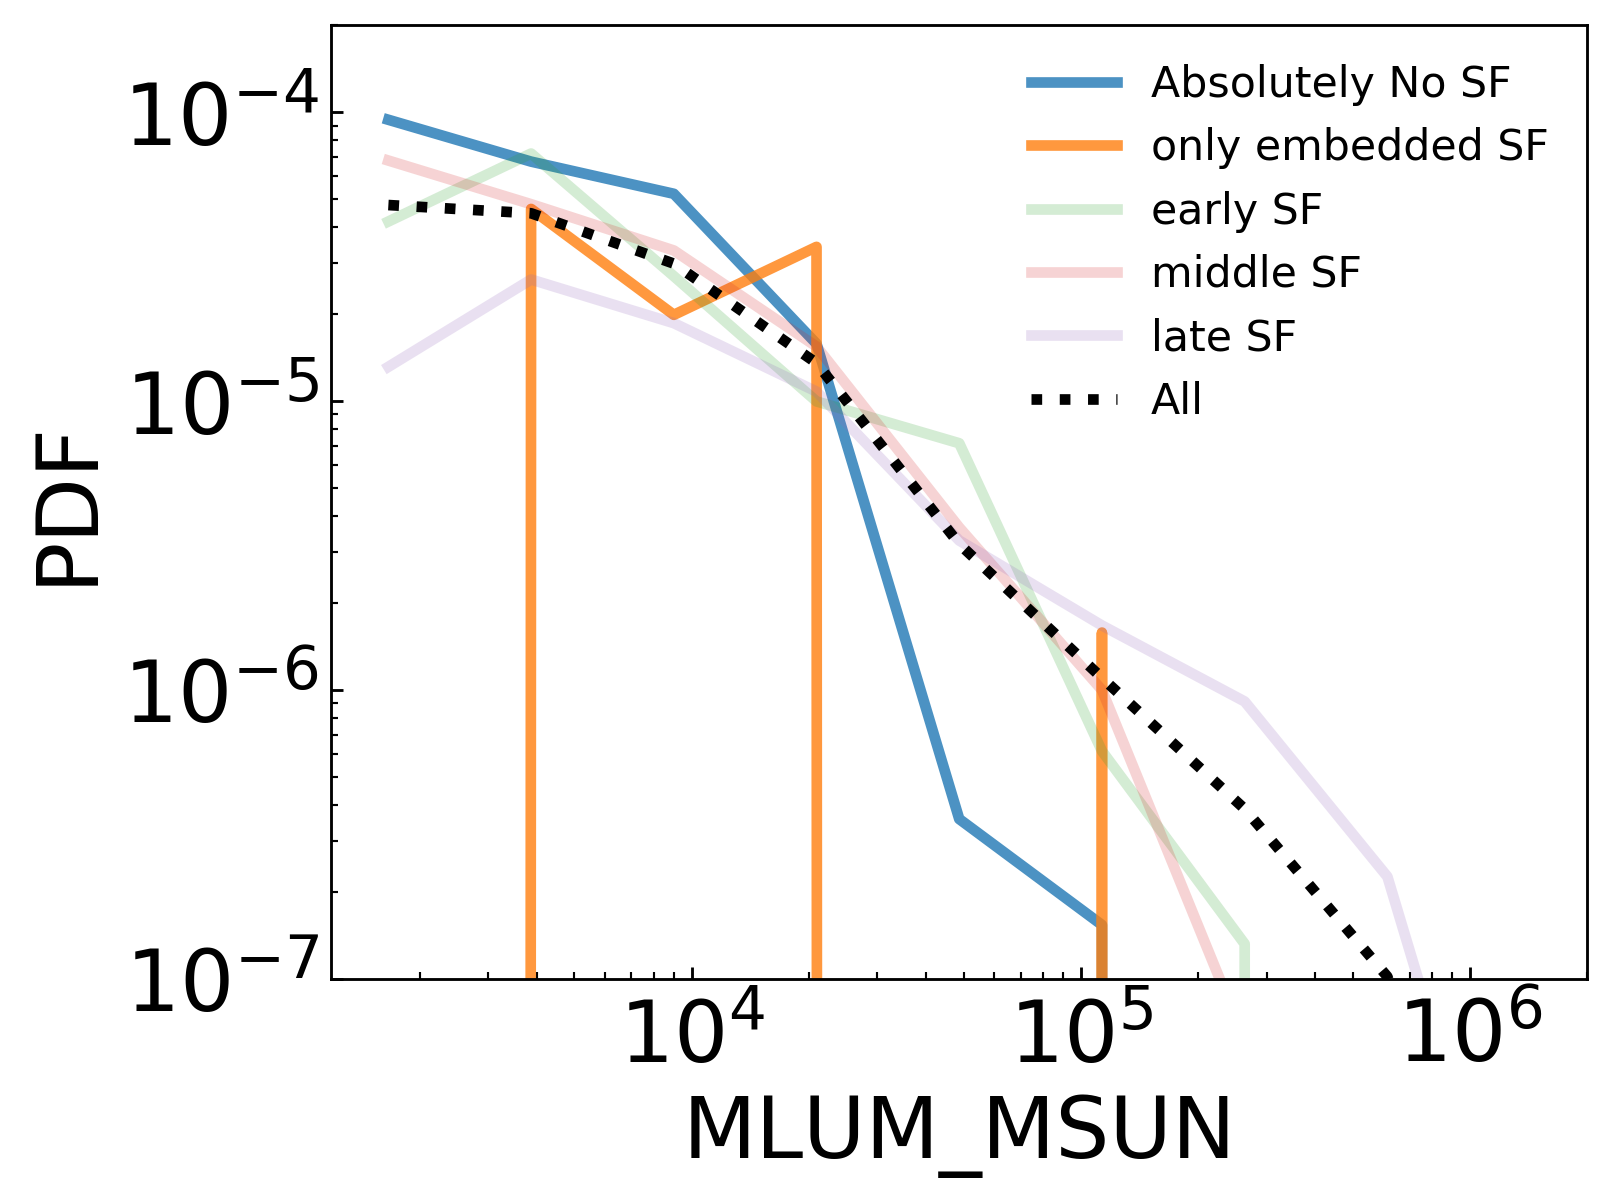

In [267]:
bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(df["MLUM_MSUN"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label="Absolutely No SF",alpha=0.8)

n,_=np.histogram(df["MLUM_MSUN"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label="only embedded SF",alpha=0.8)

n,_=np.histogram(df["MLUM_MSUN"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label="early SF",alpha=0.2)

n,_=np.histogram(df["MLUM_MSUN"][midFilt],bins)
plt.plot(binc,n/np.sum(midFilt)/binw,label="middle SF",alpha=0.2)

n,_=np.histogram(df["MLUM_MSUN"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label="late SF",alpha=0.2)

n,_=np.histogram(df["MLUM_MSUN"],bins)
plt.plot(binc,n/len(df)/binw,label="All",c='k',ls=":",alpha=1)


plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("MLUM_MSUN")
plt.ylabel("PDF")
plt.tight_layout()
plt.savefig("noSF_mass_PDF.png")

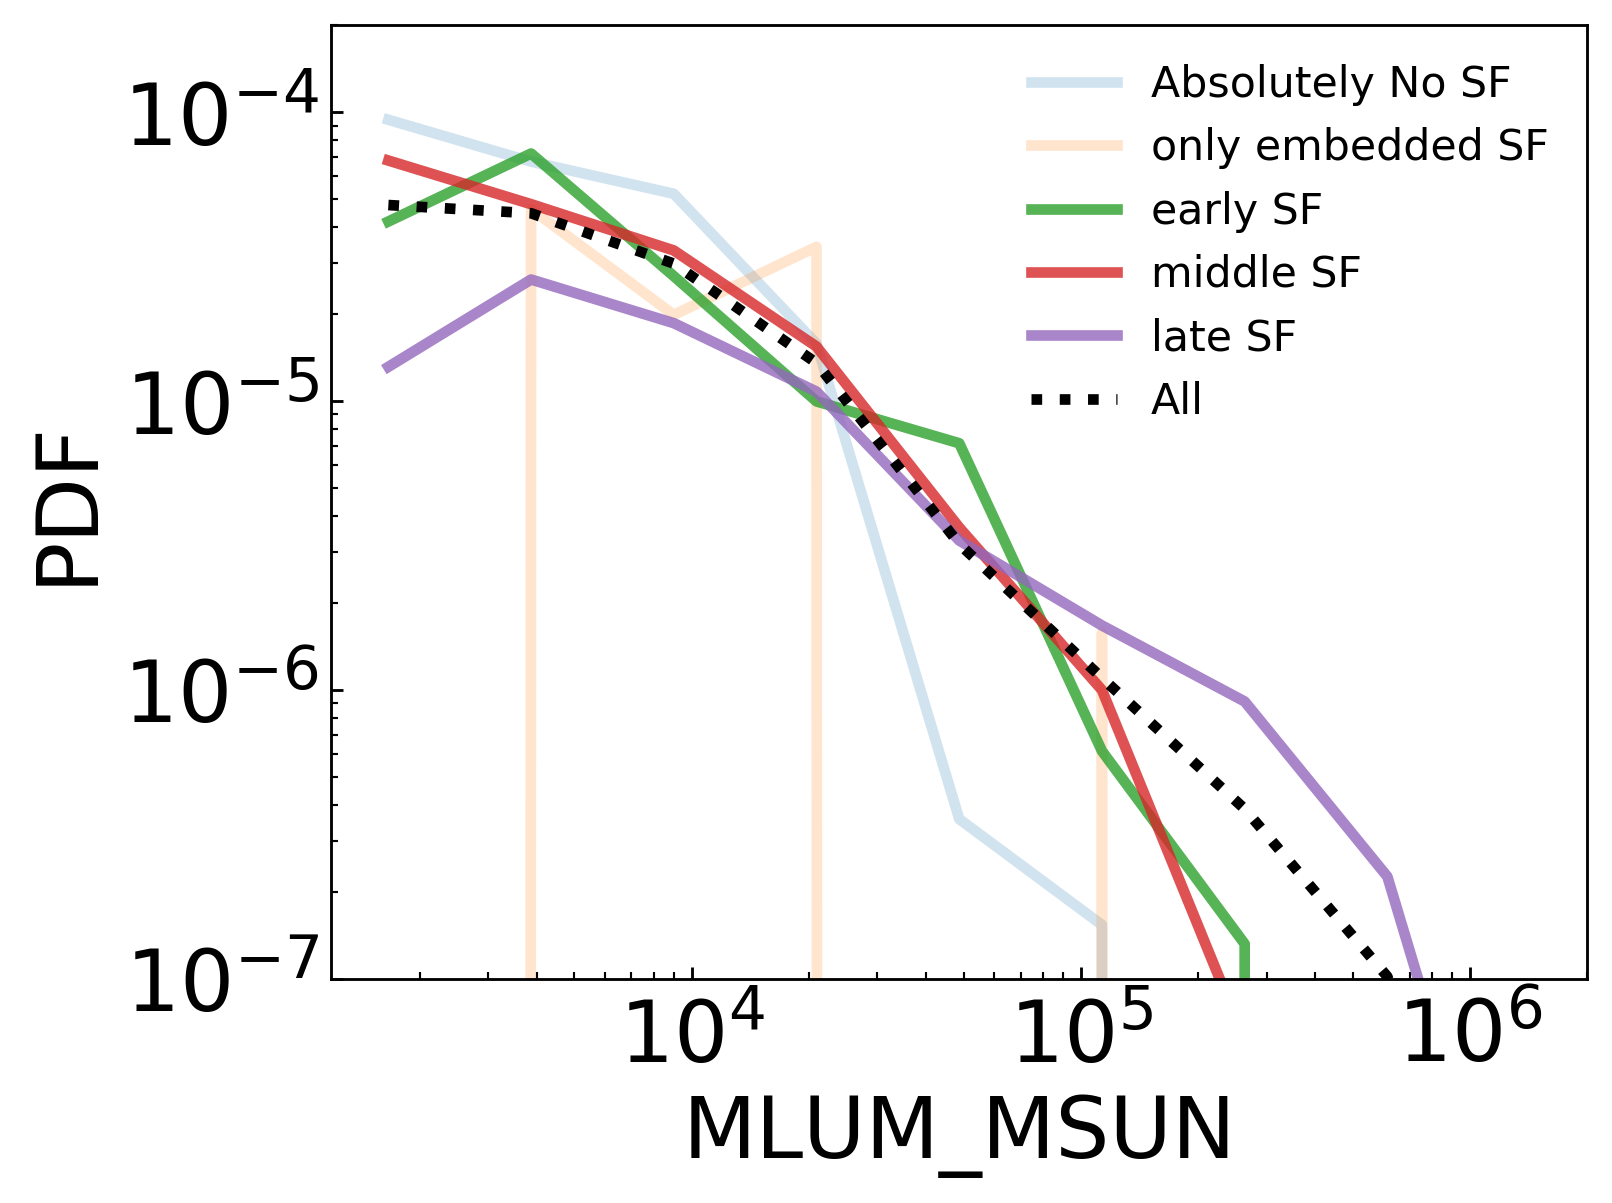

In [268]:
bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(df["MLUM_MSUN"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label="Absolutely No SF",alpha=0.2)

n,_=np.histogram(df["MLUM_MSUN"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label="only embedded SF",alpha=0.2)

n,_=np.histogram(df["MLUM_MSUN"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label="early SF",alpha=0.8)

n,_=np.histogram(df["MLUM_MSUN"][midFilt],bins)
plt.plot(binc,n/np.sum(midFilt)/binw,label="middle SF",alpha=0.8)

n,_=np.histogram(df["MLUM_MSUN"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label="late SF",alpha=0.8)

n,_=np.histogram(df["MLUM_MSUN"],bins)
plt.plot(binc,n/len(df)/binw,label="All",c='k',ls=":",alpha=1)


plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("MLUM_MSUN")
plt.ylabel("PDF")
plt.tight_layout()
plt.savefig("mass_PDF.png")

In [290]:
np.sum(np.isnan(df["HST_AV"])==False)

420

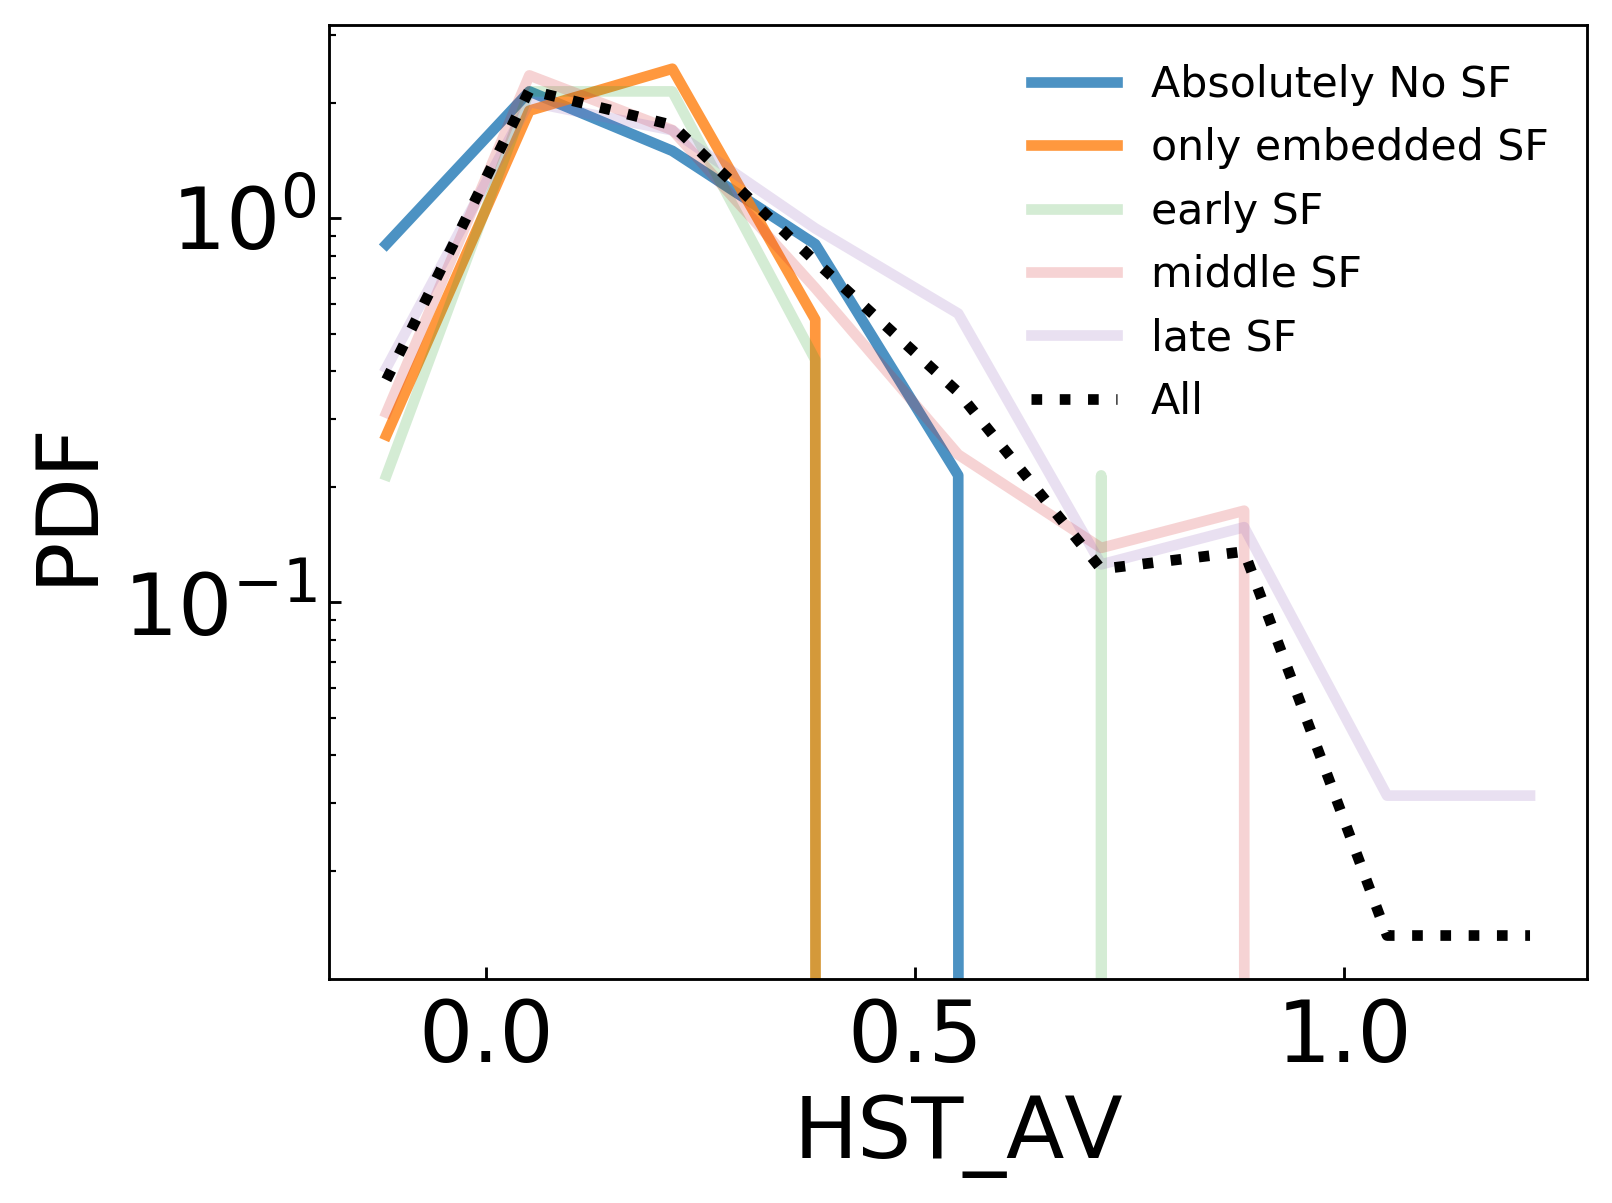

In [295]:
bins=np.linspace(-0.2,1.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(df["HST_AV"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label="Absolutely No SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label="only embedded SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label="early SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"][midFilt],bins)
plt.plot(binc,n/np.sum(midFilt)/binw,label="middle SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label="late SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"],bins)
plt.plot(binc,n/len(df)/binw,label="All",c='k',ls=":",alpha=1)


# plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("HST_AV")
plt.ylabel("PDF")
plt.tight_layout()
plt.savefig("noSF_dust_PDF.png")

In [301]:
df["HST_AV"][nothingFilt]

7      0.228775
16     0.220864
34     0.024968
48     0.065214
93          NaN
110    0.454924
220    0.324076
230    0.162759
239   -0.019642
245   -0.076561
247    0.142057
249    0.013295
257    0.486103
262         NaN
263   -0.066795
273   -0.048819
285   -0.110677
297   -0.019401
303    0.023187
315    0.098043
317    0.014997
324    0.106899
328    0.220234
334    0.214535
354    0.459953
414    0.349079
415    0.169642
436   -0.031433
Name: HST_AV, dtype: float64

SpearmanrResult(correlation=0.3511111111111111, pvalue=0.07861852220819182)


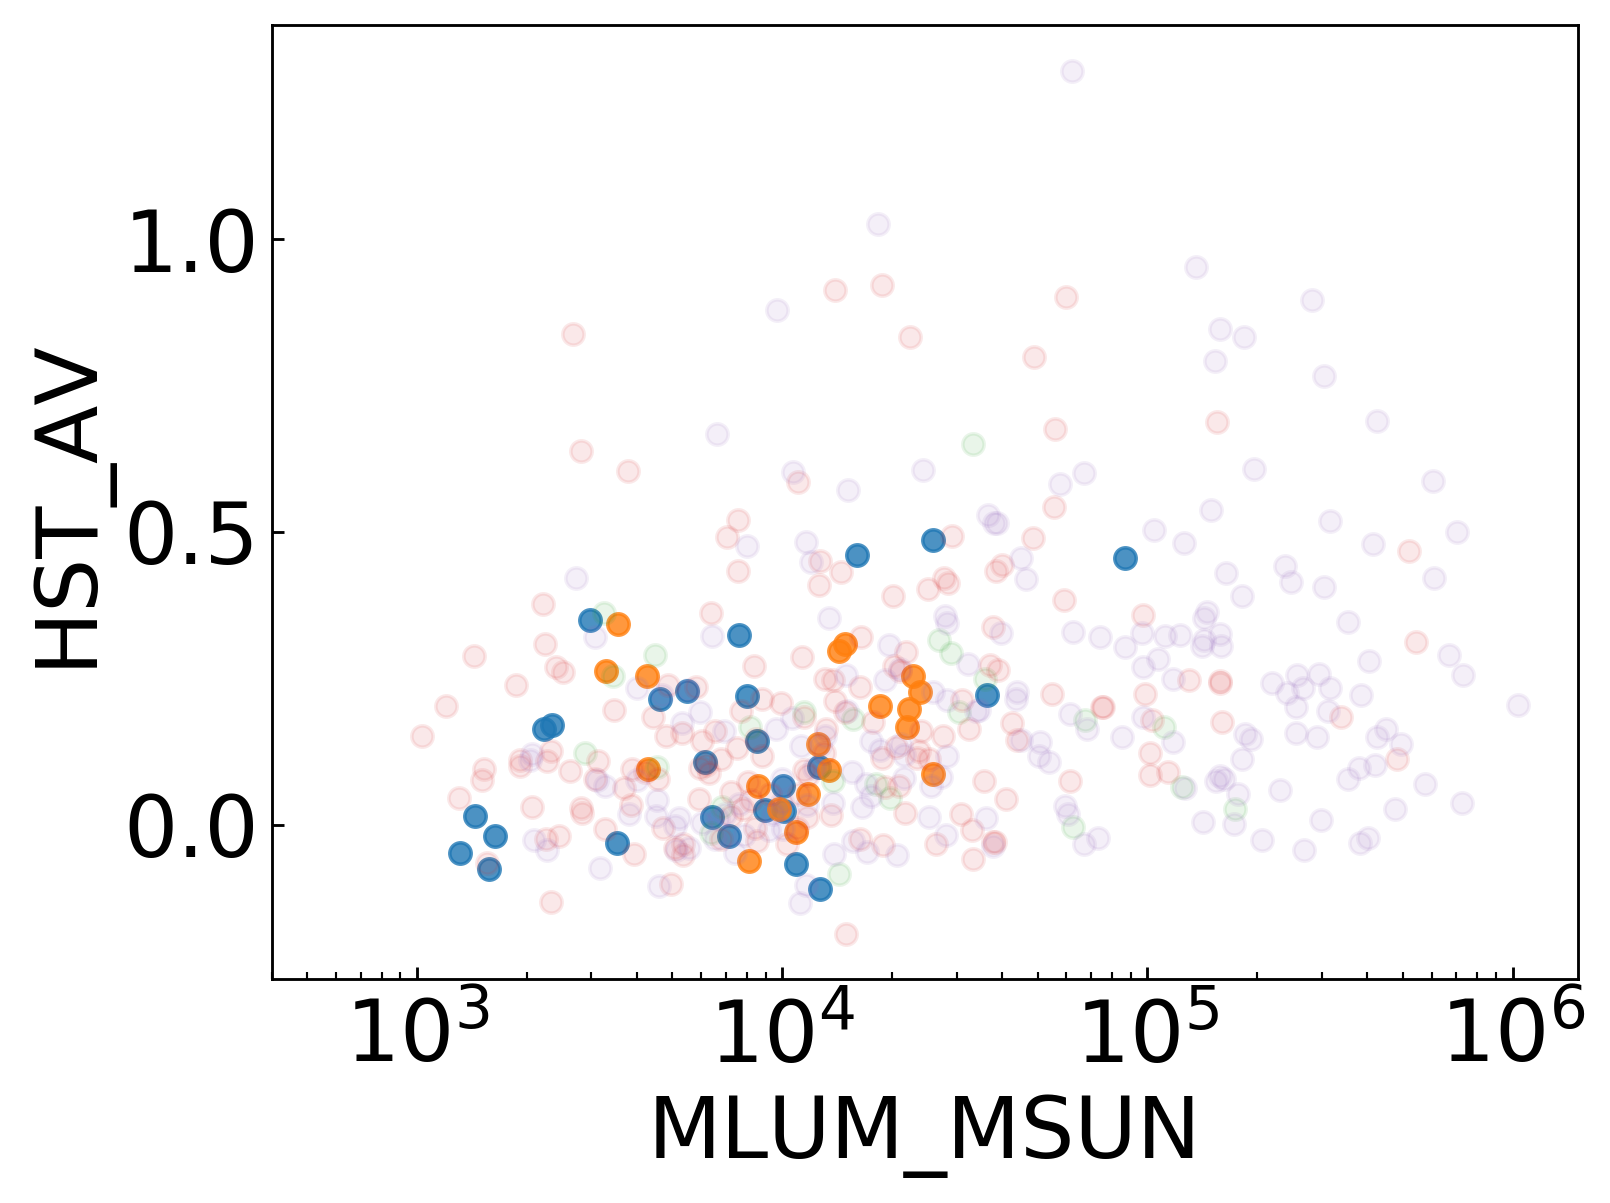

In [308]:
plt.scatter(df["MLUM_MSUN"][nothingFilt],df["HST_AV"][nothingFilt],label="Absolutely No SF",alpha=0.8)
print(stats.spearmanr(df["MLUM_MSUN"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False],df["HST_AV"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False]))
plt.scatter(df["MLUM_MSUN"][embFilt],df["HST_AV"][embFilt],label="embedded SF",alpha=0.8)
plt.scatter(df["MLUM_MSUN"][earlyFilt],df["HST_AV"][earlyFilt],label="early SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][midFilt],df["HST_AV"][midFilt],label="middle SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][lateFilt],df["HST_AV"][lateFilt],label="late SF",alpha=0.1)

plt.xlabel("MLUM_MSUN")
plt.ylabel("HST_AV")
plt.xscale("log")
plt.tight_layout()
plt.savefig("Mass_AV.png")

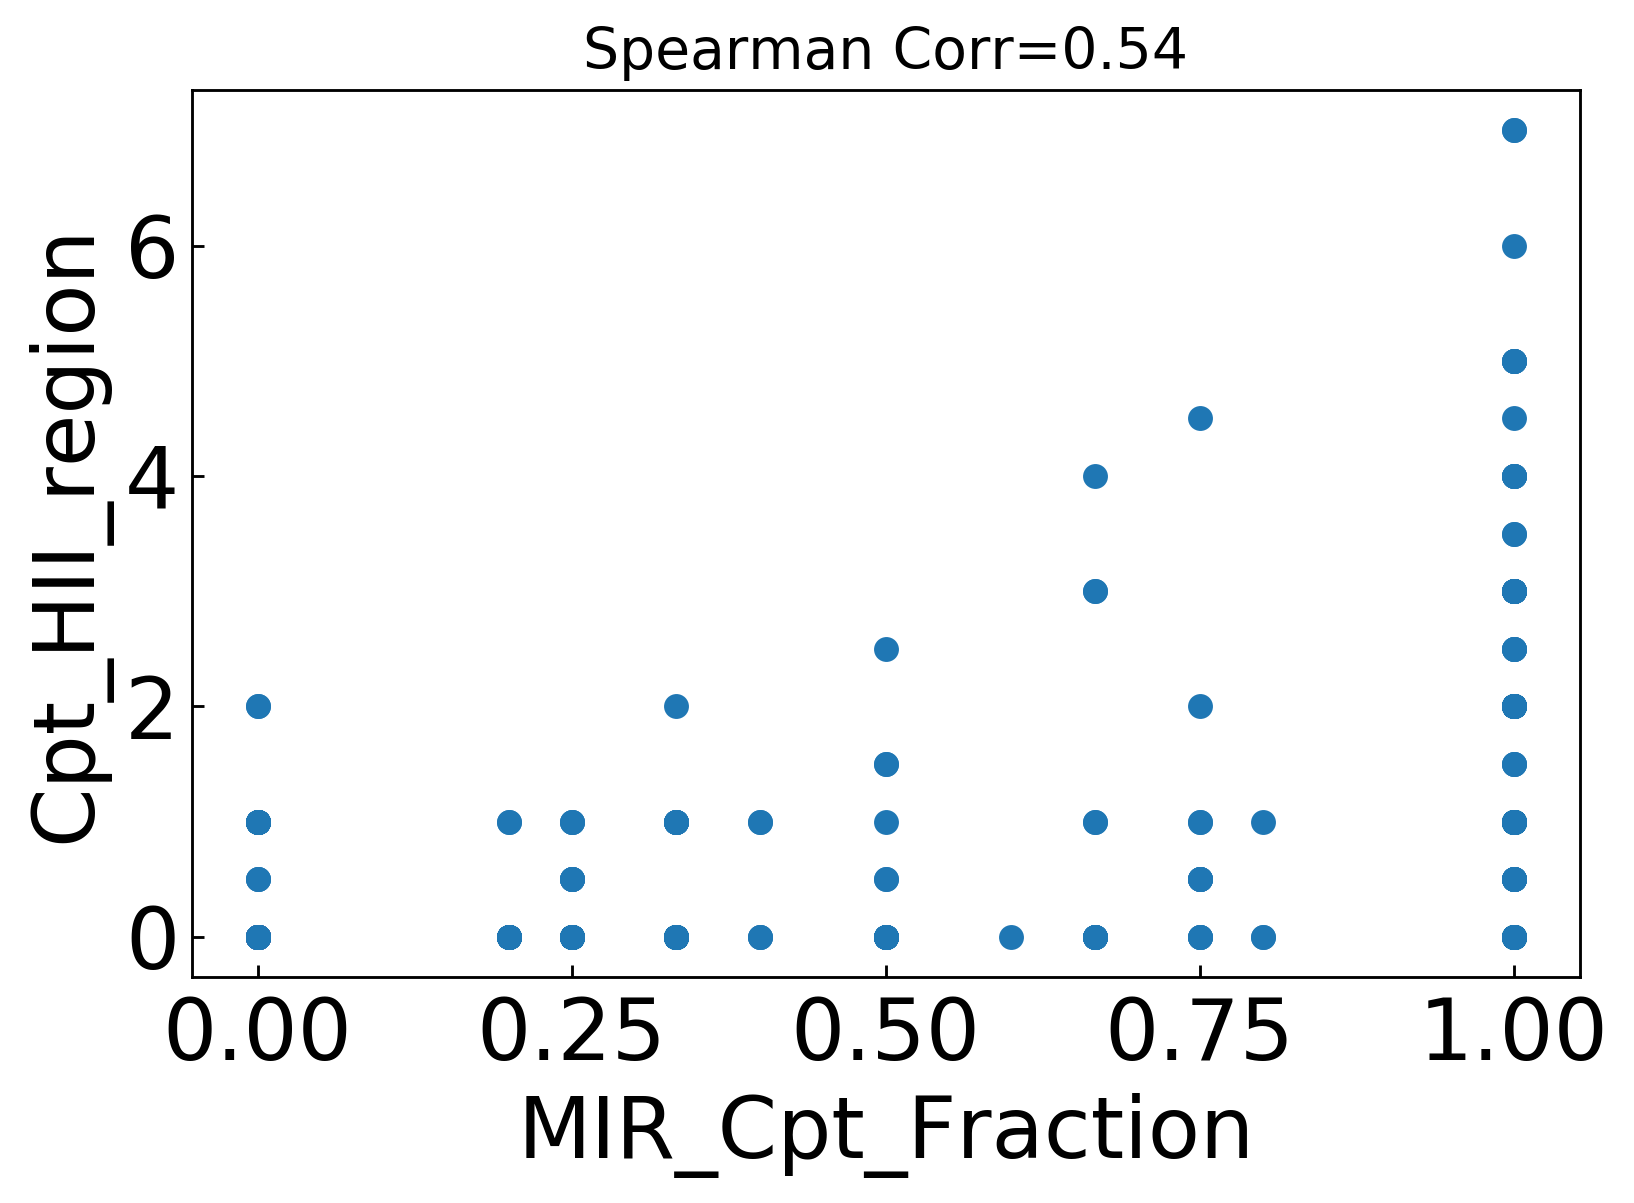

In [148]:
xlab="MIR_Cpt_Fraction"
ylab="Cpt_HII_region"

xs="linear"
ys="linear"

nanfilt=(df[xlab]=='#NUM!')|(df[ylab]=='#NUM!')
x=np.array(df[xlab][~nanfilt],dtype=float)
y=np.array(df[ylab][~nanfilt],dtype=float)
plt.figure()
plt.title("Spearman Corr={:.2f}".format(stats.spearmanr(x,y)[0]),fontsize=16)
plt.scatter(x,y)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.xscale(xs)
plt.yscale(ys)
plt.tight_layout()
plt.savefig("X_"+xlab+"_Y_"+ylab+".png")
plt.show()
plt.close()

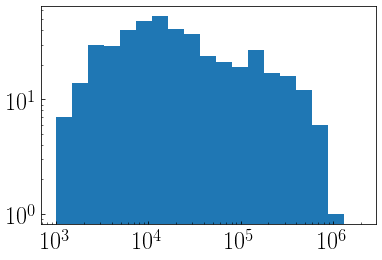

In [24]:
plt.hist(table["MLUM_MSUN"],bins=MLbin)
plt.xscale("log")
plt.yscale("log")

In [5]:
df["Compact HII Regions (optical)"]

148    0.0
149    0.0
150    0.0
151    0.0
152    0.0
153    0.0
154    0.0
155    0.0
156    2.0
157    0.0
158    1.0
159    0.0
160    1.0
161    0.0
162    0.0
163    0.0
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
170    1.0
171    0.0
172    0.0
173    0.0
174    0.0
175    2.0
176    1.0
177    2.0
      ... 
368    0.0
369    3.0
370    0.0
371    0.0
372    0.0
373    1.0
374    0.0
375    0.0
376    1.0
377    0.0
378    0.0
379    0.0
380    1.0
381    0.0
382    0.0
383    1.0
384    0.0
385    2.0
386    0.0
387    0.0
388    0.0
389    2.0
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
395    1.0
396    0.0
397    0.0
Name: Compact HII Regions (optical), Length: 250, dtype: float64

In [6]:
nOC=df["Optical Cluster"].copy()
nOC[nOC>5]=5

nFUV=df["FUV Sources"].copy()

nCmpctHII=df["Compact HII Regions (optical)"].copy()

In [7]:
young1Filt|young2Filt

NameError: name 'young1Filt' is not defined

In [22]:
roundFilt=df["Round"]==True
MIRcmpctFilt=df["MIR Compact Sources (8µm base, 24µm guide)"]==True
extHIIFilt=df["Extended HII regions (optical)"]==True


young0Filt=(nOC==0)&(nFUV==0)&(nCmpctHII==0)&(MIRcmpctFilt==False)&(extHIIFilt==False)
young1Filt=(nOC==0)&(nFUV==0)&(nCmpctHII==0)&(MIRcmpctFilt==True)&(extHIIFilt==False)
young3Filt=(nFUV>0)|(nCmpctHII>0)
young5Filt=(nOC>0)|(extHIIFilt==True)

youngFiltList=[young0Filt,young1Filt,young3Filt,young5Filt]

for f in youngFiltList:
    print(np.sum(f))

45
11
157
157


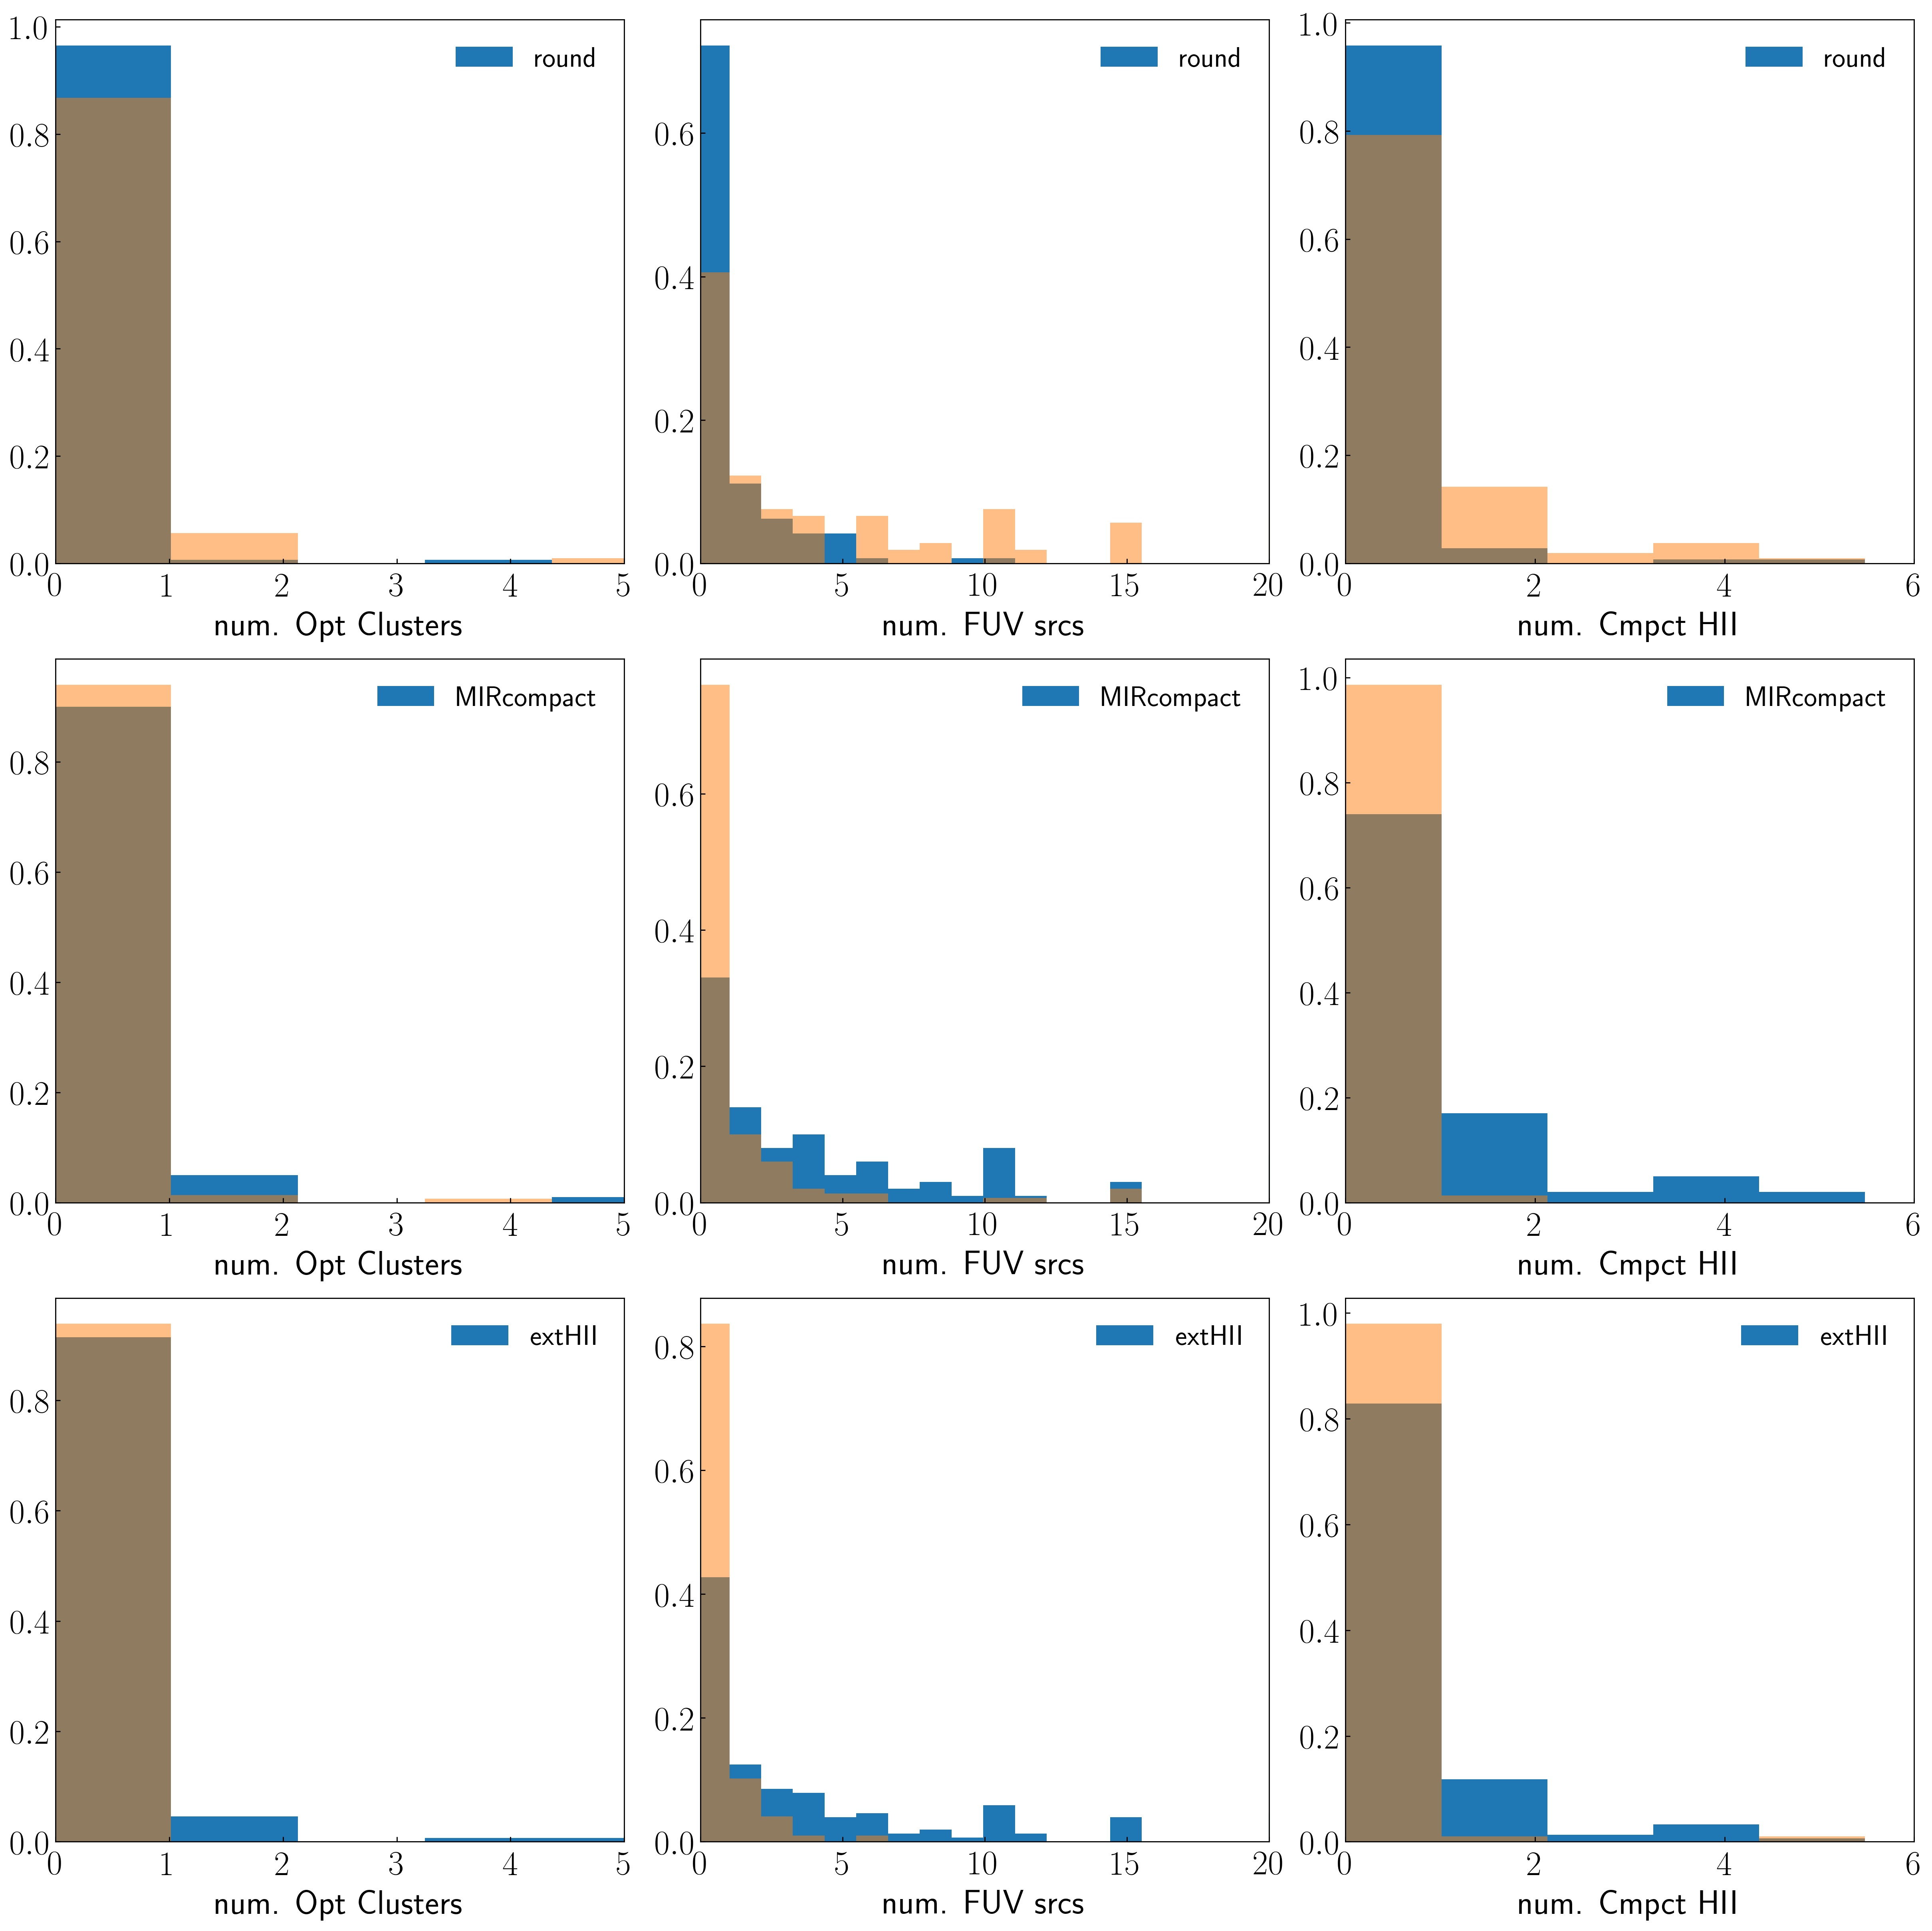

In [20]:
bins=np.linspace(-0.1,21.1,20)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

filtDict={"round":roundFilt,"MIRcompact":MIRcmpctFilt,"extHII":extHIIFilt}
dataDict={"num. Opt Clusters":nOC,"num. FUV srcs":nFUV, "num. Cmpct HII":nCmpctHII}
xlimDict={"num. Opt Clusters":5,"num. FUV srcs":20, "num. Cmpct HII":6}

fig,ax=plt.subplots(3,3,figsize=(19,19))
for ifilt,filtn in enumerate(filtDict.keys()):
    for idata,datan in enumerate(dataDict.keys()):
        n,_=np.histogram(dataDict[datan][filtDict[filtn]],bins)
        ax[ifilt][idata].bar(binc,n/np.sum(filtDict[filtn]),binw,label=filtn)
        n,_=np.histogram(dataDict[datan][~filtDict[filtn]],bins)
        ax[ifilt][idata].bar(binc,n/np.sum(~filtDict[filtn]),binw,alpha=0.5)
        ax[ifilt][idata].legend()
        ax[ifilt][idata].set_xlabel(datan)
        ax[ifilt][idata].set_xlim(0,xlimDict[datan])
plt.tight_layout()
plt.savefig("hist.png")
plt.show()


Text(0.5, 0, 'number of optical clusters')

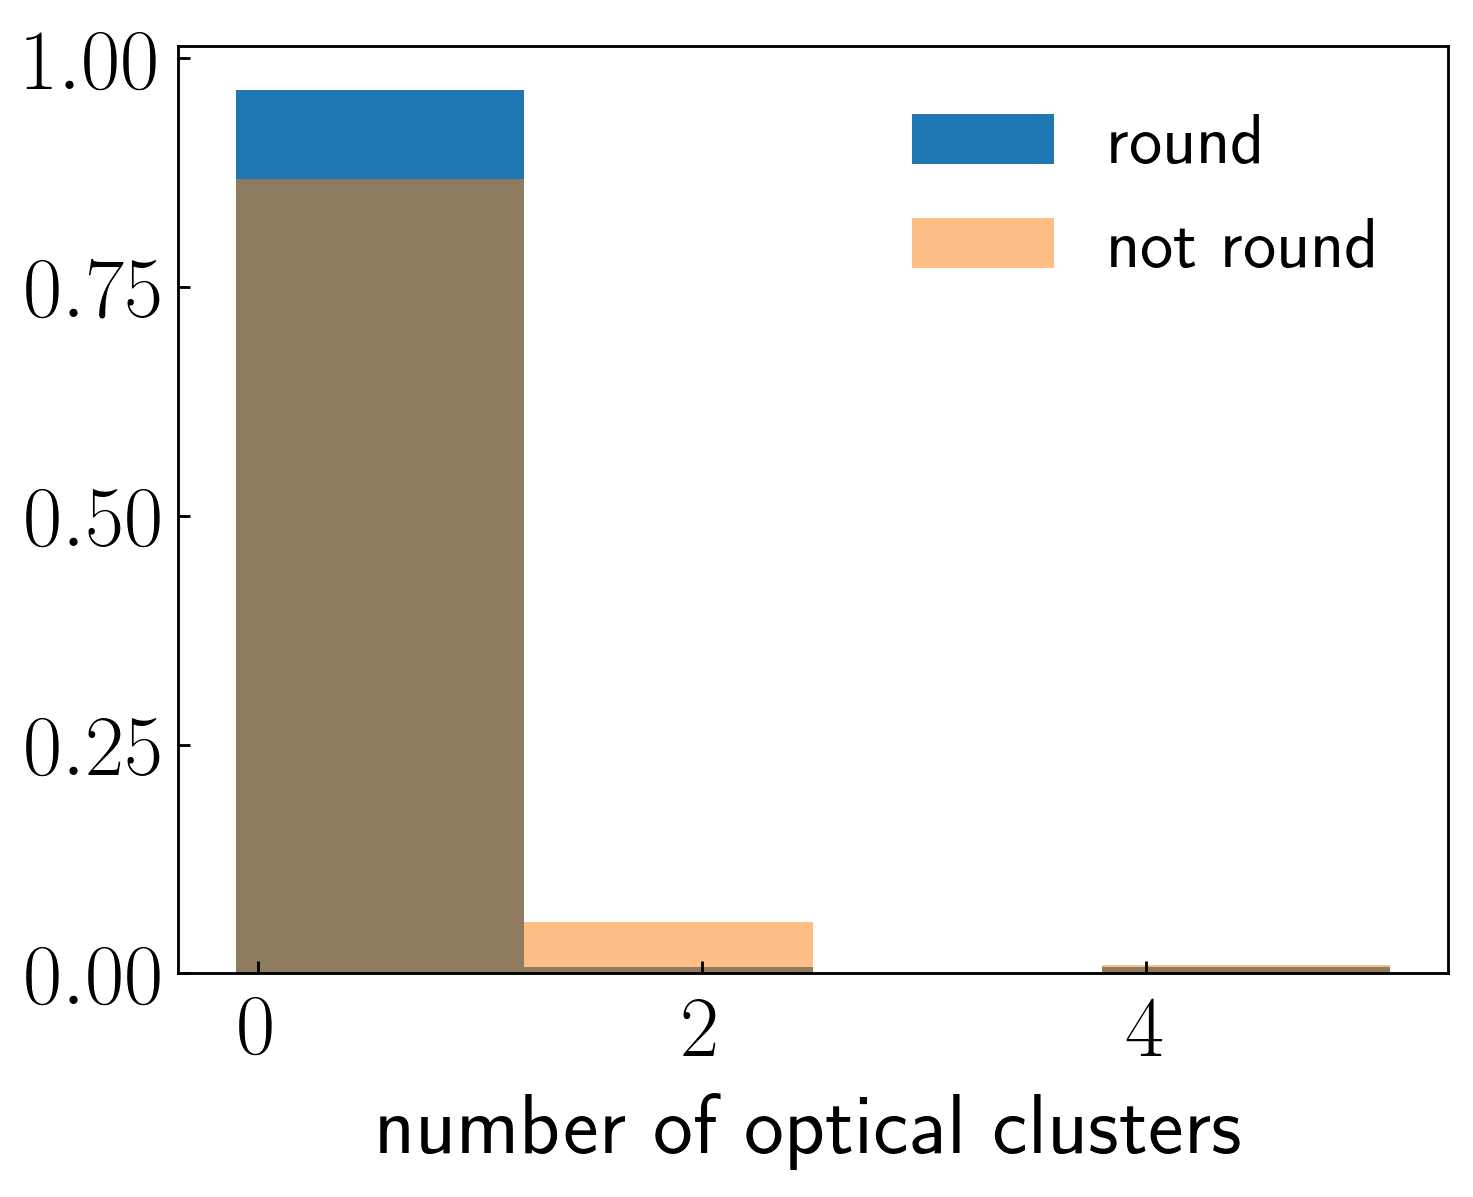

In [72]:
bins=np.linspace(-0.1,5.1,5)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(nOC[roundFilt],bins)
plt.bar(binc,n/np.sum(roundFilt),binw,label="round")

n,_=np.histogram(nOC[~roundFilt],bins)
plt.bar(binc,n/np.sum(~roundFilt),binw,label="not round",alpha=0.5)


plt.legend()
plt.xlabel("number of optical clusters")

Text(0.5, 0, 'number of FUV srcs')

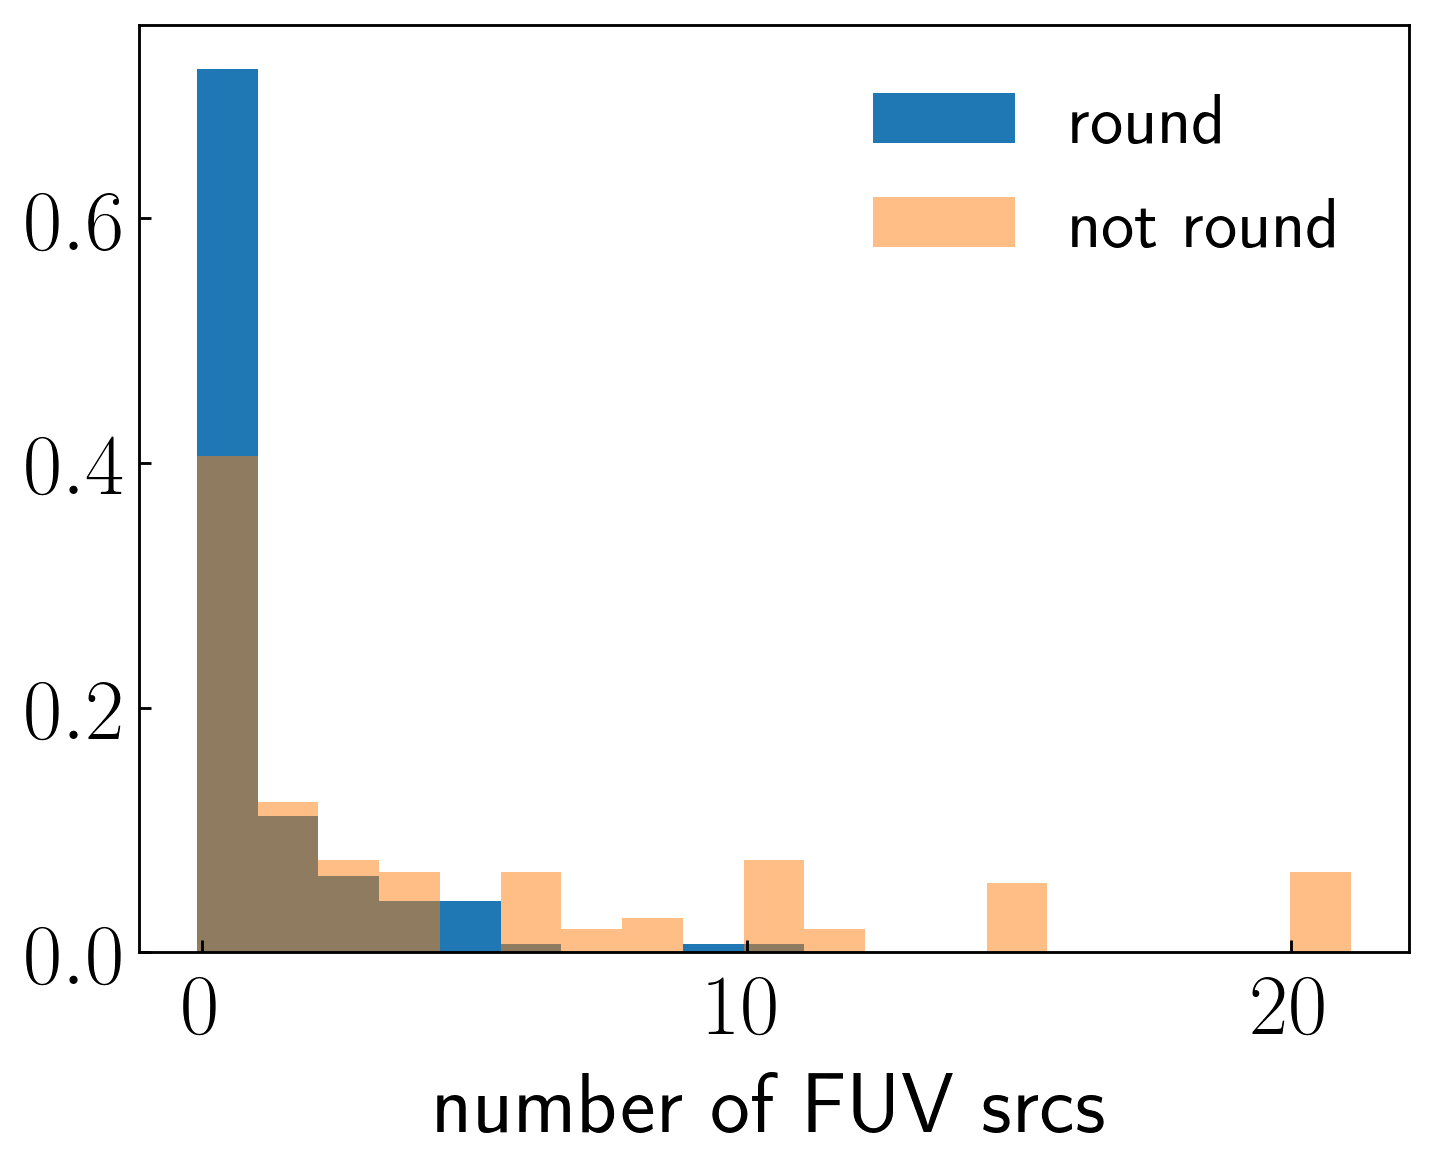

In [68]:
bins=np.linspace(-0.1,21.1,20)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

n,_=np.histogram(nFUV[roundFilt],bins)
plt.bar(binc,n/np.sum(roundFilt),binw,label="round")

n,_=np.histogram(nFUV[~roundFilt],bins)
plt.bar(binc,n/np.sum(~roundFilt),binw,label="not round",alpha=0.5)


plt.legend()
plt.xlabel("number of FUV srcs")

Text(0.5, 0, 'number of FUV srcs')

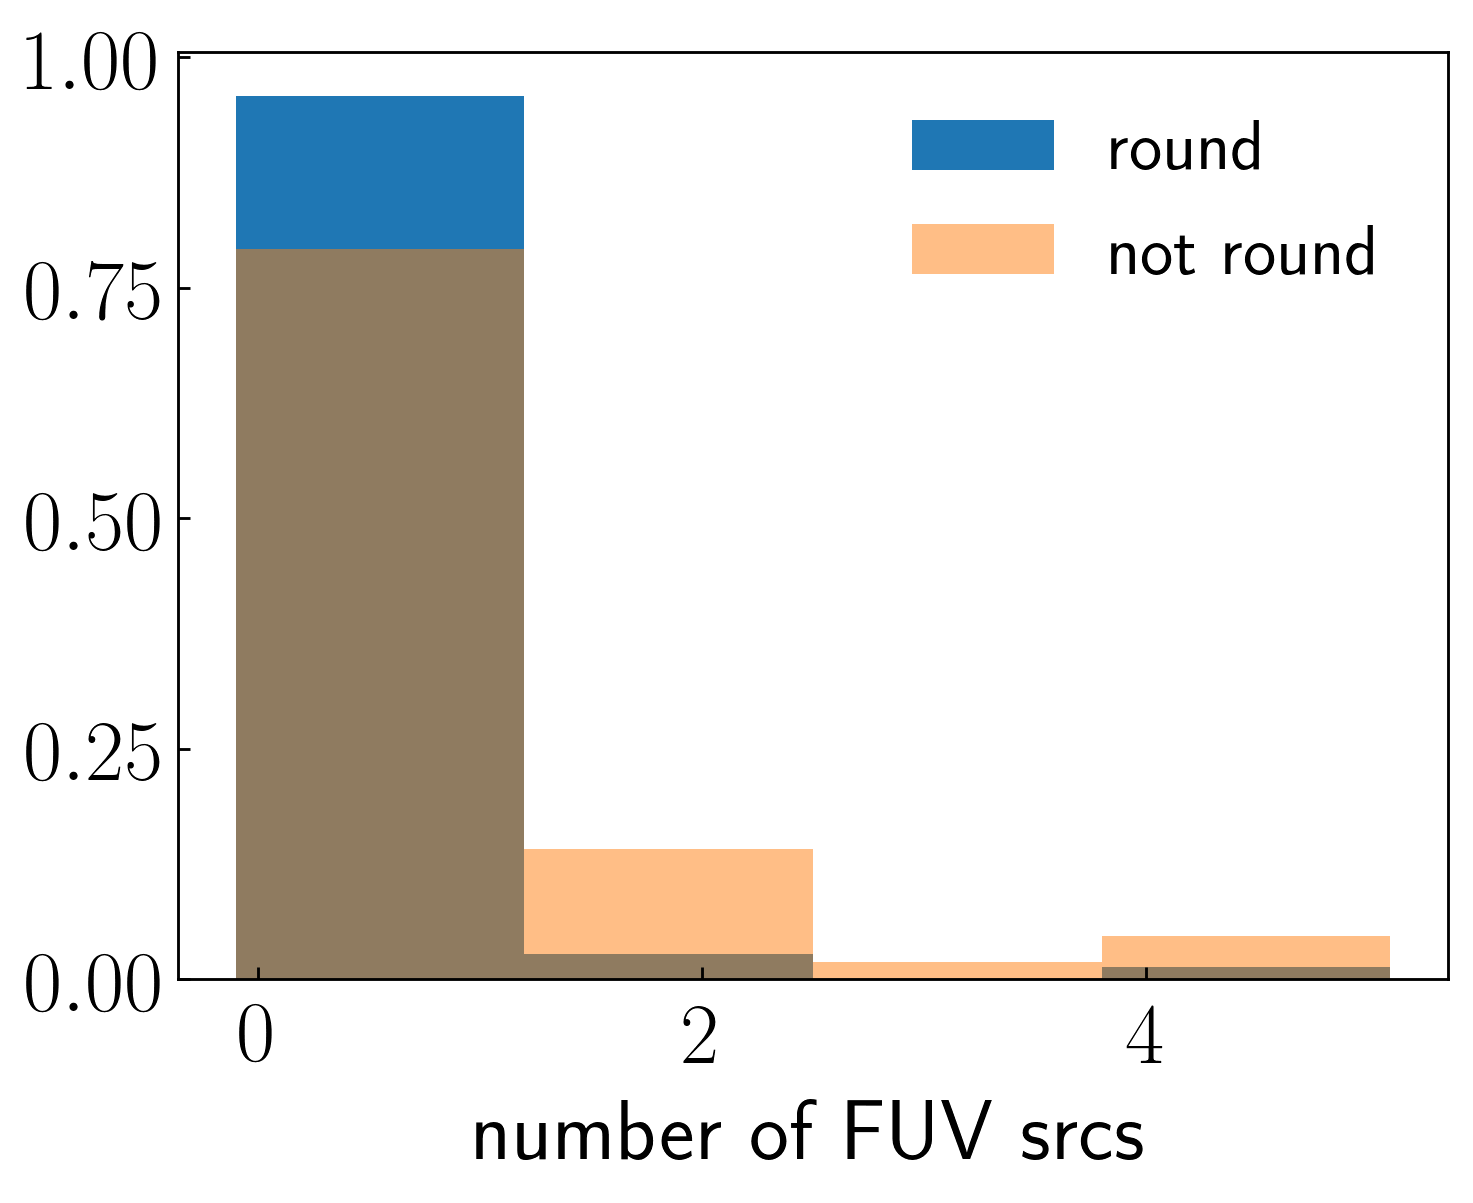

In [71]:
bins=np.linspace(-0.1,5.1,5)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

n,_=np.histogram(nCmpctHII[roundFilt],bins)
plt.bar(binc,n/np.sum(roundFilt),binw,label="round")

n,_=np.histogram(nCmpctHII[~roundFilt],bins)
plt.bar(binc,n/np.sum(~roundFilt),binw,label="not round",alpha=0.5)


plt.legend()
plt.xlabel("number of FUV srcs")